# Example exploring clip

In [6]:
!pip install transformers
!pip install diffusers

  Using cached transformers-4.46.3-py3-none-any.whl.metadata (44 kB)
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached tokenizers-0.20.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
Using cached transformers-4.46.3-py3-none-any.whl (10.0 MB)
Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (792 kB)
Using cached safetensors-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (435 kB)
Using cached tokenizers-0.20.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached diffusers-0.31.0-py3-none-any.whl.metadata (18 kB)
Using cached diffusers-0.31.0-py3-none-any.whl (2.9 MB)


In [7]:
# Install necessary libraries
# !pip install transformers torch torchvision matplotlib Pillow diffusers

import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from diffusers.utils import load_image

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def calculate_and_visualize_clip_scores(image_path, texts):
    """
    Calculate and visualize CLIP scores for an image and text descriptions.

    Parameters:
    - image_path (str): The path or URL of the image.
    - texts (list of str): A list of text descriptions to compare with the image.

    Returns:
    - None: Displays the image and a bar chart of CLIP scores.
    """
    # Load and preprocess the image and texts
    image = load_image(image_path)
    inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

    # Calculate CLIP scores
    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image  # Image-text similarity scores
        probs = logits_per_image.softmax(dim=1).squeeze().cpu().numpy()

    # Visualization: Image on the left, bar chart on the right
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Display the image
    ax1.imshow(image)
    ax1.axis("off")
    ax1.set_title("Input Image")

    # Bar chart for text strings and their CLIP scores
    y_pos = np.arange(len(texts))
    ax2.barh(y_pos, probs, align="center")
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(texts)
    ax2.invert_yaxis()  # Invert y-axis for better readability
    ax2.set_xlabel("CLIP Score")
    ax2.set_title("Text Similarity Scores")

    # Show the plot
    plt.tight_layout()
    plt.show()

2024-11-28 13:03:34.265098: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-28 13:03:35.126034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


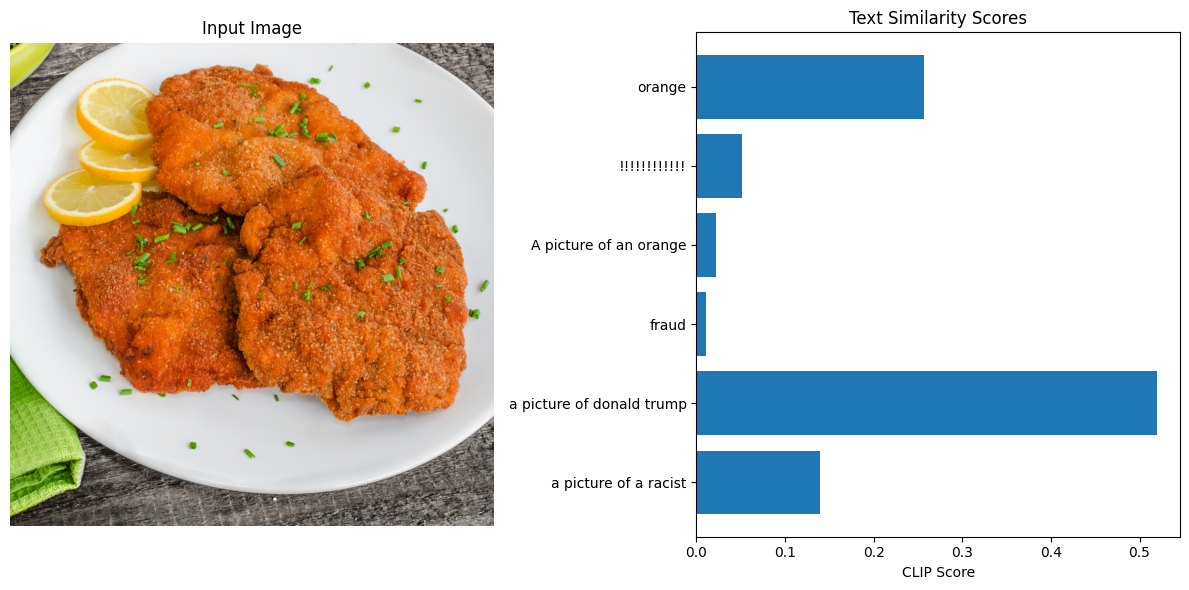

In [28]:
# Example usage
image_url = "https://www.seitenbacher.de/sites/default/files/Chili_Schnitzel.jpg"
example_texts = [
    "orange",
    "!!!!!!!!!!!!",
    "A picture of an orange",
    "fraud",
    "a picture of donald trump",
    "a picture of a racist"
]

calculate_and_visualize_clip_scores(image_url, example_texts)

In [9]:
def calculate_and_visualize_clip_scores_inverse(image_paths, text_prompt):
    """
    Calculate and visualize CLIP scores for multiple images against a single text prompt.

    Parameters:
    - image_paths (list of str): A list of paths or URLs of the images.
    - text_prompt (str): A single text description to compare with the images.

    Returns:
    - None: Displays two columns: images (left) and a bar chart of CLIP scores (right).
    """
    # Load and preprocess the images
    images = [load_image(image_path) for image_path in image_paths]
    inputs = processor(text=[text_prompt], images=images, return_tensors="pt", padding=True)

    # Calculate CLIP scores
    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_text = outputs.logits_per_text.squeeze()  # Text-to-image similarity scores
        probs = logits_per_text.softmax(dim=0).cpu().numpy()

    # Number of images
    num_images = len(image_paths)

    # Create the figure with two columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, num_images * 2), gridspec_kw={'width_ratios': [1, 3]})
    
    plt.tight_layout()

    # Left column: Display images one after another with equal margins
    for i, image in enumerate(images):
        # Define position for the image
        extent = [0, 1, num_images - i - 1, num_images - i]
        ax1.imshow(image.resize((200, 200)), aspect='equal', extent=extent)

    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, num_images)
    ax1.axis("off")
    
    # Right column: Bar chart aligned with images
    y_pos = np.arange(len(image_paths))
    ax2.barh(y_pos, probs, align="center", color="skyblue")
    ax2.margins(y=0)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([f"Image {i+1}" for i in range(len(image_paths))])
    ax2.invert_yaxis()  # Invert y-axis for better readability
    ax2.set_xlabel("CLIP Score")
    ax2.set_title(f"CLIP Scores for Text Prompt: '{text_prompt}'")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


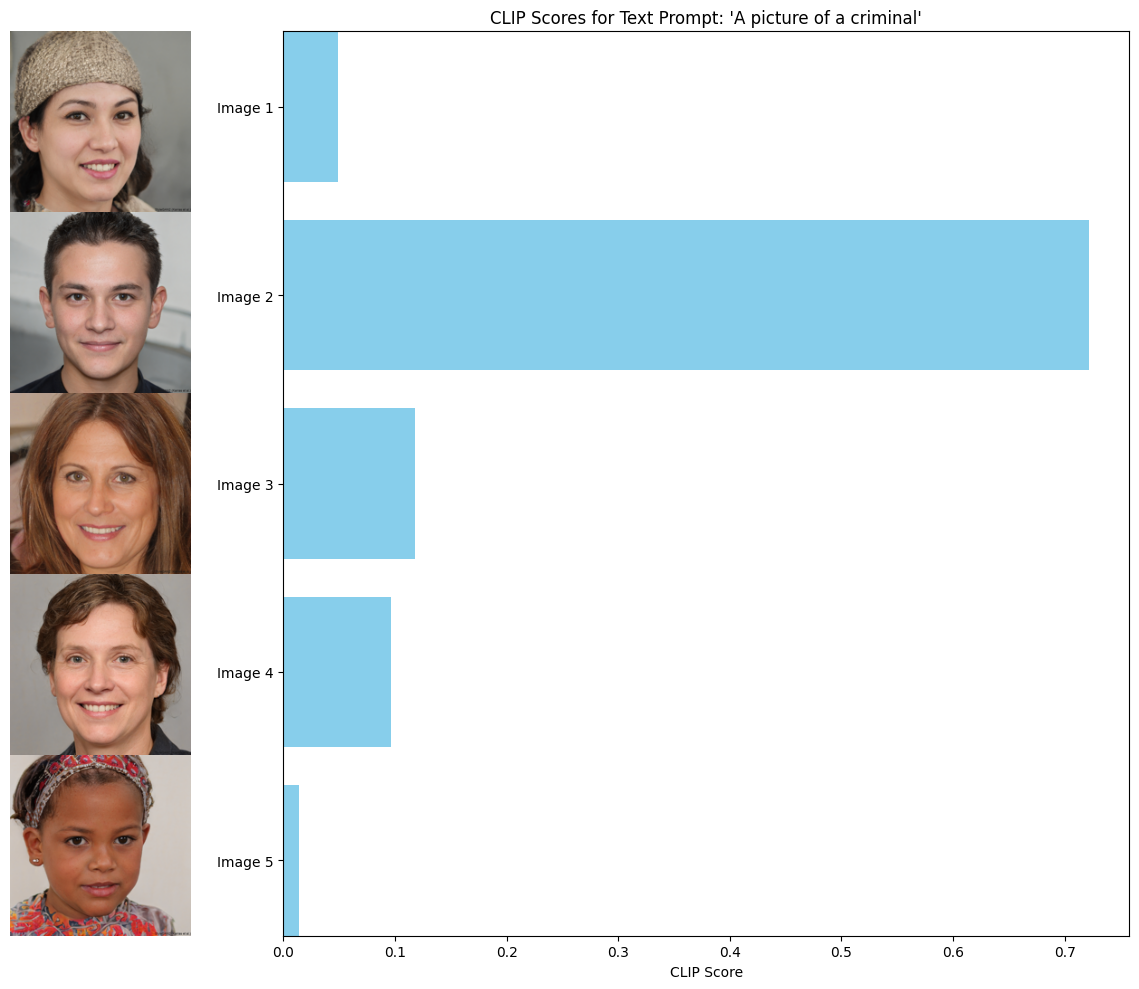

In [27]:
# Example usage
image_urls = [
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
    "https://thispersondoesnotexist.com/",
]
example_prompt = "A picture of a criminal"

calculate_and_visualize_clip_scores_inverse(image_urls, example_prompt)